   Statistics  MCTS vs Random  MCTS vs Simple 1  MCTS vs Simple 2  \
0       count     1000.000000       1845.000000        995.000000   
1        mean        4.502000          4.484553          4.513568   
2         std        0.733849          0.723337          0.753641   
3         min        4.000000          4.000000          4.000000   
4         25%        4.000000          4.000000          4.000000   
5         50%        4.000000          4.000000          4.000000   
6         75%        5.000000          5.000000          5.000000   
7         max        8.000000         11.000000          9.000000   
8        mode        4.000000          4.000000          4.000000   
9       range        4.000000          7.000000          5.000000   
10   variance        0.538535          0.523216          0.567975   
11   skewness        1.576759          1.826920          1.564656   
12   kurtosis        2.774125          5.701274          2.712089   

    MCTS vs MCTS  Simple 2 vs Ran

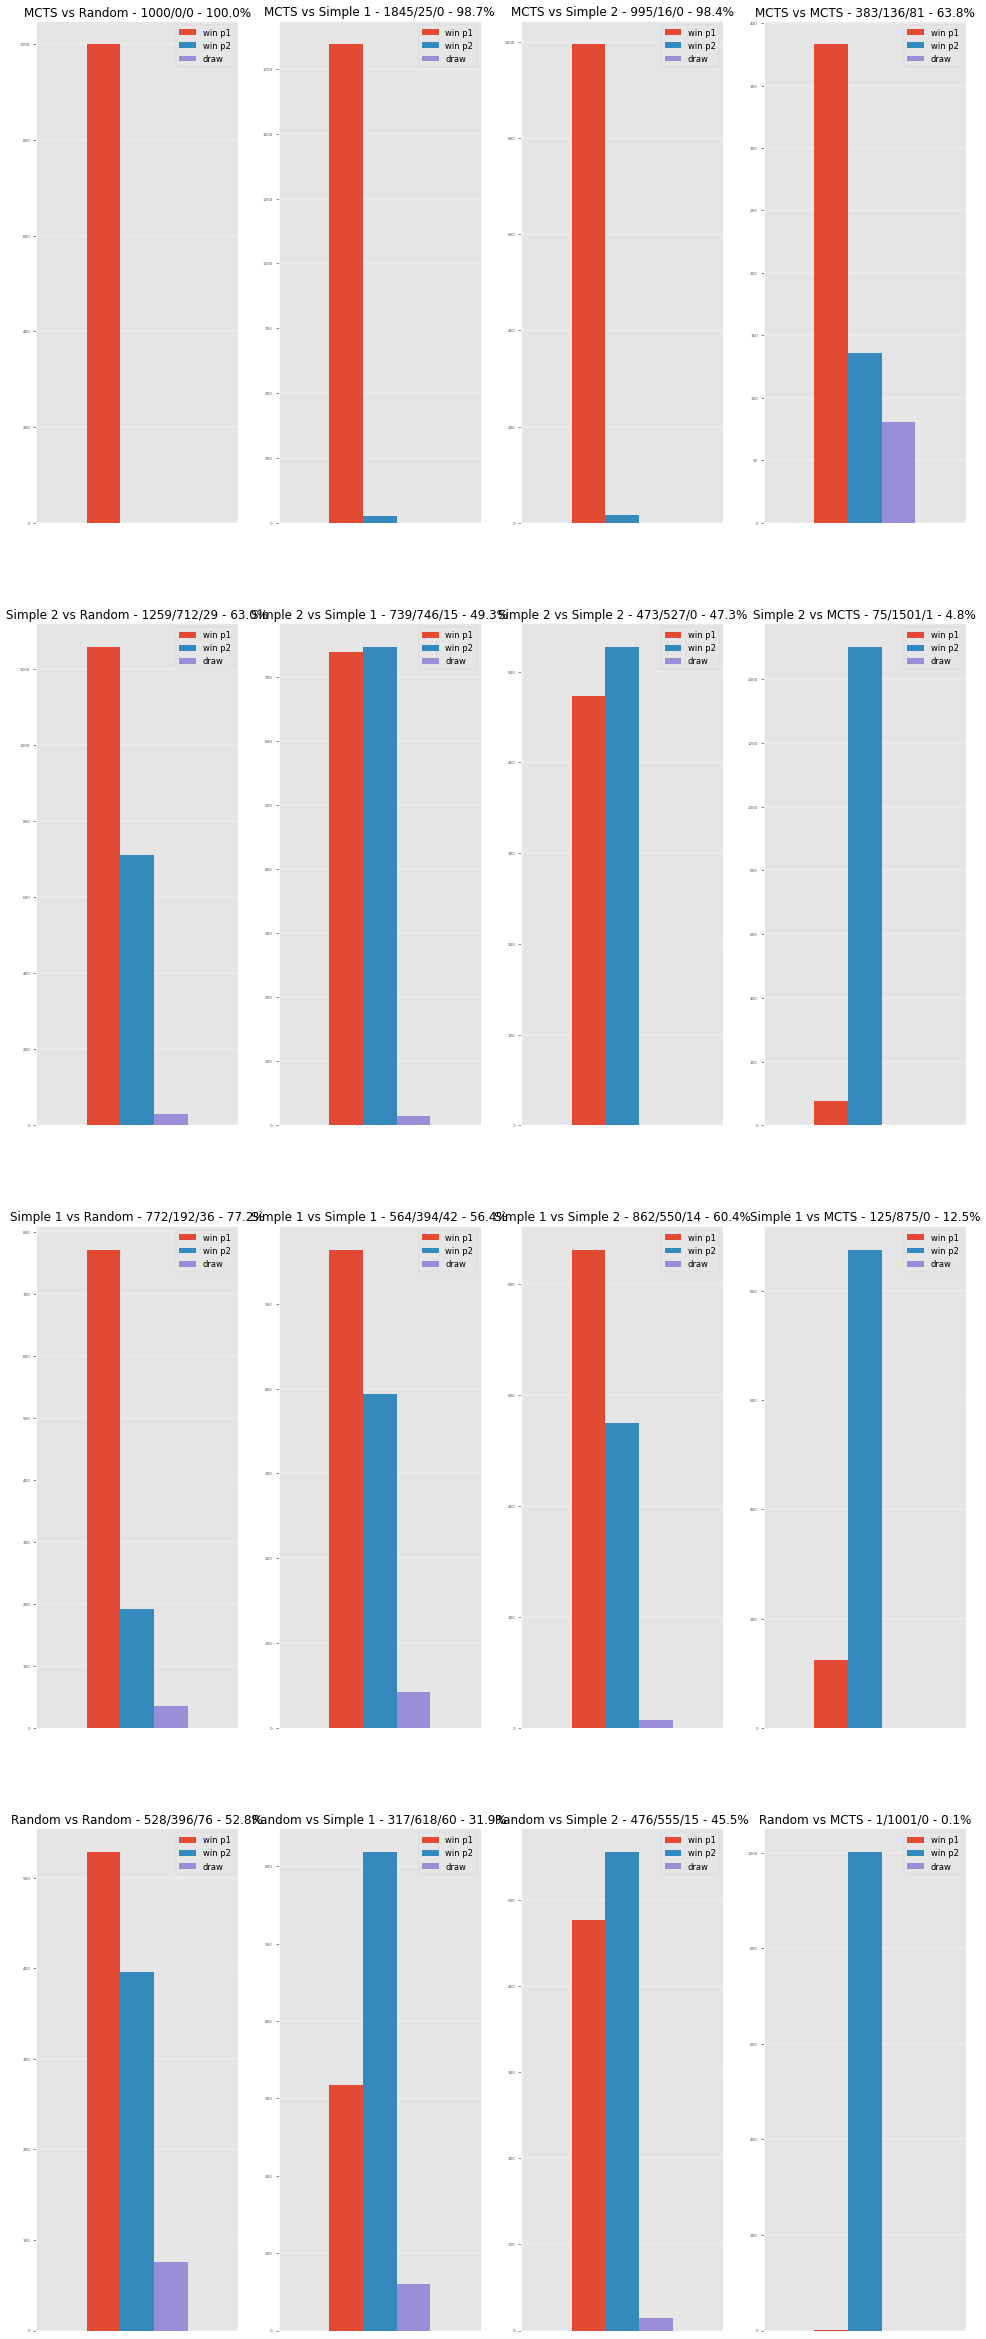

In [1]:
"""
# Main Game Log:
adds entry to dp (.csv) looking like this
| player1_type | player2_type | starting_player | winning_player |
|--------------|--------------|-----------------|----------------|
| player       | player       | 1               | 0              |
| bot_random   | bot_random   | 2               | 1              |
| bot_simple   | bot_simple   | 1               | 2              |
| bot_complex  | bot_complex  | 2               | 0              |
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("bmh")
plt.style.use("ggplot")

df = pd.read_csv("game_log.csv")


def sort_by_match_type(df, player1, player2):
    """

    player one starts matches
    player1: string of player name
    player2: string of player name
    """
    temp_data_list = []
    for index, row in df.iterrows():
        if row["player1_type"] == player1 and row["player2_type"] == player2:
            temp_data_list.append(row)
    one_match = pd.DataFrame(temp_data_list)

    return one_match


def sort_winners(df):
    win_counter_player_1 = 0
    win_counter_player_2 = 0
    draw_count = 0

    for index, row in df.iterrows():
        if row["winning_player"] == 1:
            win_counter_player_1 += 1
        elif row["winning_player"] == 2:
            win_counter_player_2 += 1
        elif row["winning_player"] == 0:
            draw_count += 1

    counter_dict = [
        {
            "win p1": win_counter_player_1,
            "win p2": win_counter_player_2,
            "draw": draw_count,
        }
    ]

    df_counter = pd.DataFrame.from_dict(counter_dict)
    return df_counter


def w_l_ratio(df):
    win = (df["winning_player"] == 1).sum()
    loss = (df["winning_player"] == 2).sum()
    draw = (df["winning_player"] == 0).sum()
    preformance_percentage = round((win / (win + loss + draw)) * 100, 1)
    return [f"{win}/{loss}/{draw}", f"{preformance_percentage}%"]


def string_to_numpy_array(string):
    elements = string.strip("[]").split()
    individual_elements = [int(elem) for elem in elements]
    array = np.reshape(individual_elements, (5, 5))
    return array


def first_move_count_to_win(df):
    num_moves_to_win = []
    for index, row in df.iterrows():
        if row["winning_player"] == 1:
            final_board = string_to_numpy_array(row["5x5_final_board_flat"])
            count_player_moves = np.count_nonzero(final_board == 1)
            num_moves_to_win.append(count_player_moves)
    return num_moves_to_win


def second_move_count_to_win(df):
    num_moves_to_win = []
    for index, row in df.iterrows():
        if row["winning_player"] == 2:
            final_board = string_to_numpy_array(row["5x5_final_board_flat"])
            count_player_moves = np.count_nonzero(final_board == 2)
            num_moves_to_win.append(count_player_moves)
    return num_moves_to_win

def analyze_final_board(data):
    df = pd.DataFrame(data, columns=["Values"])
    descriptive_stats = df['Values'].describe()  # This includes count, mean, std, min, 25%, 50%, 75%, max
    mode = df.mode().values[0][0]  # The most common value
    range_val = df['Values'].max() - df['Values'].min()  # Range
    variance = df['Values'].var()  # Variance
    skewness = df['Values'].skew()  # Skewness
    kurtosis = df['Values'].kurt()  # Kurtosis
    
    descriptive_stats['mode'] = mode
    descriptive_stats['range'] = range_val
    descriptive_stats['variance'] = variance
    descriptive_stats['skewness'] = skewness
    descriptive_stats['kurtosis'] = kurtosis
    return descriptive_stats

# splitting dataframes into matches
mcts_vs_random = sort_by_match_type(df, "bot_MCTS", "bot_random")
mcts_vs_simple_1 = sort_by_match_type(df, "bot_MCTS", "bot_simple")
mcts_vs_simple_2 = sort_by_match_type(df, "bot_MCTS", "bot_simple_2")
mcts_vs_mcts = sort_by_match_type(df, "bot_MCTS", "bot_MCTS")

simple_1_vs_random = sort_by_match_type(df, "bot_simple", "bot_random")
simple_1_vs_simple_1 = sort_by_match_type(df, "bot_simple", "bot_simple")
simple_1_vs_simple_2 = sort_by_match_type(df, "bot_simple", "bot_simple_2")
simple_1_vs_mcts = sort_by_match_type(df, "bot_simple", "bot_MCTS")

simple_2_vs_random = sort_by_match_type(df, "bot_simple_2", "bot_random")
simple_2_vs_simple_1 = sort_by_match_type(df, "bot_simple_2", "bot_simple")
simple_2_vs_simple_2 = sort_by_match_type(df, "bot_simple_2", "bot_simple_2")
simple_2_vs_mcts = sort_by_match_type(df, "bot_simple_2", "bot_MCTS")

random_vs_random = sort_by_match_type(df, "bot_random", "bot_random")
random_vs_simple_1 = sort_by_match_type(df, "bot_random", "bot_simple")
random_vs_simple_2 = sort_by_match_type(df, "bot_random", "bot_simple_2")
random_vs_mcts = sort_by_match_type(df, "bot_random", "bot_MCTS")

dfs_as_list = [
    mcts_vs_random,
    mcts_vs_simple_1,
    mcts_vs_simple_2,
    mcts_vs_mcts,
    simple_2_vs_random,
    simple_2_vs_simple_1,
    simple_2_vs_simple_2,
    simple_2_vs_mcts,
    simple_1_vs_random,
    simple_1_vs_simple_1,
    simple_1_vs_simple_2,
    simple_1_vs_mcts,
    random_vs_random,
    random_vs_simple_1,
    random_vs_simple_2,
    random_vs_mcts,
]

titles_as_list = [
    "MCTS vs Random",
    "MCTS vs Simple 1",
    "MCTS vs Simple 2",
    "MCTS vs MCTS",
    "Simple 2 vs Random",
    "Simple 2 vs Simple 1",
    "Simple 2 vs Simple 2",
    "Simple 2 vs MCTS",
    "Simple 1 vs Random",
    "Simple 1 vs Simple 1",
    "Simple 1 vs Simple 2",
    "Simple 1 vs MCTS",
    "Random vs Random",
    "Random vs Simple 1",
    "Random vs Simple 2",
    "Random vs MCTS",
]


df_game_stats_first_player = pd.concat([analyze_final_board(first_move_count_to_win(mcts_vs_random)).rename_axis('Statistics').reset_index(),
                                        analyze_final_board(first_move_count_to_win(mcts_vs_simple_1)).rename_axis('Statistics').reset_index().iloc[:, 1],
                                        analyze_final_board(first_move_count_to_win(mcts_vs_simple_2)).rename_axis('Statistics').reset_index().iloc[:, 1],
                                        analyze_final_board(first_move_count_to_win(mcts_vs_mcts)).rename_axis('Statistics').reset_index().iloc[:, 1],
                                        analyze_final_board(first_move_count_to_win(simple_1_vs_random)).rename_axis('Statistics').reset_index().iloc[:, 1],
                                        analyze_final_board(first_move_count_to_win(simple_1_vs_simple_1)).rename_axis('Statistics').reset_index().iloc[:, 1],
                                        analyze_final_board(first_move_count_to_win(simple_1_vs_simple_2)).rename_axis('Statistics').reset_index().iloc[:, 1],
                                        analyze_final_board(first_move_count_to_win(simple_1_vs_random)).rename_axis('Statistics').reset_index().iloc[:, 1],
                                        analyze_final_board(first_move_count_to_win(simple_2_vs_random)).rename_axis('Statistics').reset_index().iloc[:, 1],
                                        analyze_final_board(first_move_count_to_win(simple_2_vs_simple_1)).rename_axis('Statistics').reset_index().iloc[:, 1],
                                        analyze_final_board(first_move_count_to_win(simple_2_vs_simple_2)).rename_axis('Statistics').reset_index().iloc[:, 1],
                                        analyze_final_board(first_move_count_to_win(simple_2_vs_mcts)).rename_axis('Statistics').reset_index().iloc[:, 1],
                                        analyze_final_board(first_move_count_to_win(random_vs_random)).rename_axis('Statistics').reset_index().iloc[:, 1],
                                        analyze_final_board(first_move_count_to_win(random_vs_simple_1)).rename_axis('Statistics').reset_index().iloc[:, 1],
                                        analyze_final_board(first_move_count_to_win(random_vs_simple_2)).rename_axis('Statistics').reset_index().iloc[:, 1],
                                        analyze_final_board(first_move_count_to_win(random_vs_mcts)).rename_axis('Statistics').reset_index().iloc[:, 1]],
                                        axis=1)

first_move_col_labels = [
    "Statistics",
    "MCTS vs Random",
    "MCTS vs Simple 1",
    "MCTS vs Simple 2",
    "MCTS vs MCTS",
    "Simple 2 vs Random",
    "Simple 2 vs Simple 1",
    "Simple 2 vs Simple 2",
    "Simple 2 vs MCTS",
    "Simple 1 vs Random",
    "Simple 1 vs Simple 1",
    "Simple 1 vs Simple 2",
    "Simple 1 vs MCTS",
    "Random vs Random",
    "Random vs Simple 1",
    "Random vs Simple 2",
    "Random vs MCTS",
]

df_game_stats_first_player.columns = first_move_col_labels
# df_game_stats_first_player.drop_duplicates(keep='first', inplace=True)

df_game_stats_second_player = pd.concat([analyze_final_board(second_move_count_to_win(mcts_vs_simple_1)).rename_axis('Statistics').reset_index(),
                                         analyze_final_board(second_move_count_to_win(mcts_vs_mcts)).rename_axis('Statistics').reset_index().iloc[:, 1],
                                         analyze_final_board(second_move_count_to_win(simple_1_vs_random)).rename_axis('Statistics').reset_index().iloc[:, 1],
                                         analyze_final_board(second_move_count_to_win(simple_1_vs_simple_1)).rename_axis('Statistics').reset_index().iloc[:, 1],
                                         analyze_final_board(second_move_count_to_win(simple_1_vs_simple_2)).rename_axis('Statistics').reset_index().iloc[:, 1],
                                         analyze_final_board(second_move_count_to_win(simple_1_vs_random)).rename_axis('Statistics').reset_index().iloc[:, 1],
                                         analyze_final_board(second_move_count_to_win(simple_2_vs_random)).rename_axis('Statistics').reset_index().iloc[:, 1],
                                         analyze_final_board(second_move_count_to_win(simple_2_vs_simple_1)).rename_axis('Statistics').reset_index().iloc[:, 1],
                                         analyze_final_board(second_move_count_to_win(simple_2_vs_simple_2)).rename_axis('Statistics').reset_index().iloc[:, 1],
                                         analyze_final_board(second_move_count_to_win(simple_2_vs_mcts)).rename_axis('Statistics').reset_index().iloc[:, 1],
                                         analyze_final_board(second_move_count_to_win(random_vs_random)).rename_axis('Statistics').reset_index().iloc[:, 1],
                                         analyze_final_board(second_move_count_to_win(random_vs_simple_1)).rename_axis('Statistics').reset_index().iloc[:, 1],
                                         analyze_final_board(second_move_count_to_win(random_vs_simple_2)).rename_axis('Statistics').reset_index().iloc[:, 1],
                                         analyze_final_board(second_move_count_to_win(random_vs_mcts)).rename_axis('Statistics').reset_index().iloc[:, 1]],
                                         axis=1)    

second_move_col_labels = [
    "Statistics",
    "MCTS vs Simple 1",
    "MCTS vs MCTS",
    "Simple 2 vs Random",
    "Simple 2 vs Simple 1",
    "Simple 2 vs Simple 2",
    "Simple 2 vs MCTS",
    "Simple 1 vs Random",
    "Simple 1 vs Simple 1",
    "Simple 1 vs Simple 2",
    "Simple 1 vs MCTS",
    "Random vs Random",
    "Random vs Simple 1",
    "Random vs Simple 2",
    "Random vs MCTS",
]

df_game_stats_second_player.columns = second_move_col_labels


print(df_game_stats_first_player)
print(df_game_stats_second_player)

n_rows = 4
n_cols = 4

fig, axes = plt.subplots(figsize=(20, 50), dpi=60, nrows=n_rows, ncols=n_cols)

counter = 0
for row in range(n_rows):
    for col in range(n_cols):
        plot_title = f"{titles_as_list[counter]} - {w_l_ratio(dfs_as_list[counter])[0]} - {w_l_ratio(dfs_as_list[counter])[1]}"
        sort_winners(dfs_as_list[counter]).plot(
            ax=axes[row, col],
            kind="bar",
            title=plot_title,
            xticks=[],
            fontsize=5
        )
        print(titles_as_list[counter], w_l_ratio(dfs_as_list[counter])[1])

        counter += 1

plt.show()
